In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import random
import scipy.spatial.distance as metric

In [3]:
data = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=.9)

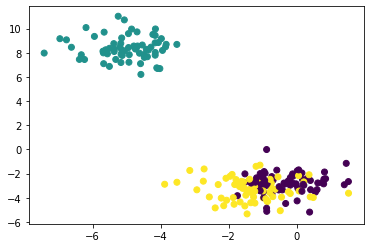

In [4]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')

In [6]:
def euclidean_dist(A, B):
    return metric.euclidean(A, B)

In [7]:
def plot(data,k,index,centroids,orig_centroids):
    input = []
    for i in range(len(index)):
        for j in index[i]:
            input.append(int(j))
            
    colors = 10*["g","r","c","b","k"]
    j=0
    for i in input:
        plt.scatter(data[0][j,0], data[0][j,1], marker="x", color=colors[i], s=150, linewidths=5)
        j+=1
    ## New centroids
    for centroid in range(len(centroids)):
        plt.scatter(centroids[centroid][0],centroids[centroid][1],marker="o", color="k", s=150, linewidths=5)
    # Original Clusters
    for centroid in range(len(orig_centroids)):
        plt.scatter(orig_centroids[centroid][0],orig_centroids[centroid][1],marker="D", color="DarkBlue", s=150, linewidths=5)

In [8]:
class K_Means:
    def __init__(self,k,data,centeriod_init=None):
        self.k = k
        self.data = data  
        self.centeriod_init = centeriod_init
        
    def initialise_centroids(self,centeriod_init,k,data):
        ##  way to initialize centroides
        if(self.centeriod_init == 'random'): 
            initial_centroids = np.random.permutation(data.shape[0])[:self.k]
            self.centroids = data[initial_centroids]
        return self.centroids    
 
    def fit(self,data):
        m = np.shape(data)[0]
        cluster_assignments = np.mat(np.zeros((m,2)))
        
        cents = self.initialise_centroids(self.centeriod_init,self.k,data)
        
        # Preserve original centroids
        cents_orig = cents.copy()
        changed = True
        num_iter = 0
        
        while changed and num_iter<100:
            changed = False 
            # for each row in the dataset
            for i in range(m):
                # Track minimum distance and vector index of associated cluster
                min_dist = np.inf
                min_index = -1 
                #calculate distance 
                for j in range(self.k):
                    dist_ji = euclidean_dist(cents[j,:],data[i,:])
                    if(dist_ji < min_dist):
                        min_dist = dist_ji
                        min_index = j 
                    # Check if cluster assignment of instance has changed
                    if cluster_assignments[i, 0] != min_index: 
                        changed = True

                # Assign instance to appropriate cluster
                cluster_assignments[i, :] = min_index, min_dist**2

            # Update centroid location
            for cent in range(self.k):
                points = data[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
                cents[cent,:] = np.mean(points, axis=0)
    
            # Count iterations
            num_iter += 1
            #print(num_iter)

         # Return important stuff when done
        return cents, cluster_assignments, num_iter, cents_orig

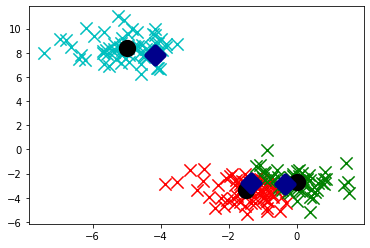

In [9]:
kmeans = K_Means(k=3,data = data[0],centeriod_init='random')
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
k=3
plot(data,k,index,centroids,orig_centroids)

Text(0, 0.5, 'Dispersion')

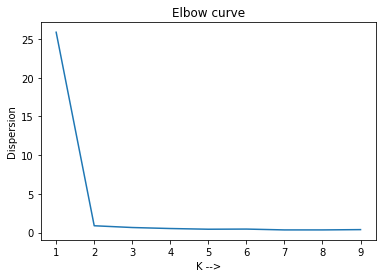

In [12]:
costs = []
for i in range(10):
    kmeans = K_Means(k=i,data = data[0],centeriod_init='random')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(data[0])
    distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
    cost = sum(distance)/(2*len(data[0]))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)
    
x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("Dispersion")